## Dependencias

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Datos de entrenamiento







In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Creamos una red densa con una sola capa

* `input_shape=[1]` - la entrada es un valor único

* `units = 1` - numero de neuronas en la capa





In [4]:
lvl0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Ensamblamos la capa en el modelo

In [5]:
model = tf.keras.Sequential([lvl0])

## Compilamos el modelo antes del entrenamiento

Para ello le proporcionamos al modelo la **funcion de perdida** (error cuadratico medio) y la **función de optimizador** (Adam)

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Entrenamos el modelo

Durante el entrenamiento, el modelo toma valores en grados Celsius, realiza un cálculo utilizando las variables internas actuales (llamadas "pesos") y genera valores que deben ser el equivalente en Fahrenheit. Dado que los pesos se establecen inicialmente de forma aleatoria, la salida no se acercará al valor correcto. La diferencia entre la salida real y la salida deseada se calcula utilizando la función de pérdida, y la función del optimizador indica cómo se deben ajustar los pesos.

Este ciclo de calcular, comparar y ajustar está controlado por el método `fit`. El primer argumento son las entradas, el segundo argumento son las salidas deseadas. El argumento `epochs`especifica cuántas veces se debe ejecutar este ciclo y el argumento `verbose` controla la cantidad de salida que produce el método..

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Estadísticas de entrenamiento


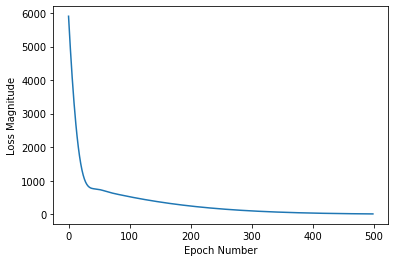

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usamos el modelo para predecir valores



In [9]:
print(model.predict([100.0]))

[[211.29448]]


## Pesos que el modelo ha obtenido


In [10]:
print("These are the layer variables: {}".format(lvl0.get_weights()))

These are the layer variables: [array([[1.8264151]], dtype=float32), array([28.652966], dtype=float32)]
